In [883]:
#importing data

In [884]:
import pandas as pd
import numpy as np

In [885]:
crop = pd.read_excel("https://github.com/shrush11/HACKX/blob/main/Crop_prediction.xlsx")

In [886]:
#exploring data

In [887]:
crop.head()

,Region,Month,WeatherCondition,Soil fertility,HungerIndex,MalnutritionRate,Bulk Nutrient,SeedQuality,Temperature,Crop_Cultivation,Irrigation Method
0,temperate,5,rainy,6.0,22,34,Phosphorous,HIGH,28,Soya bean,drip
1,semi-arid,7,humid,8.0,47,55,Calcium,HIGH,23,Groundnut,furrow
2,semi-arid,10,dry,8.0,15,69,Sodium,HIGH,34,Groundnut,furrow
3,arid,12,humid,9.0,90,48,Calcium,HIGH,42,Maize,sprinkler
4,temperate,8,rainy,4.0,36,34,Phosphorous,LOW,24,Wheat,drip


In [888]:
crop.describe()

,Month,Soil fertility,HungerIndex,MalnutritionRate,Temperature
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.360000,6.655000,42.790000,50.940000,30.850000
std,3.453939,1.627874,28.884757,24.680103,5.487129
min,1.000000,3.000000,0.000000,10.000000,23.000000
25%,3.000000,5.000000,15.750000,34.000000,26.000000
50%,6.000000,7.000000,39.000000,50.500000,30.000000
75%,9.250000,8.000000,67.000000,77.000000,35.250000
max,12.000000,9.000000,100.000000,91.000000,49.000000


In [889]:
crop.columns

Index(['Region', 'Month', 'WeatherCondition', 'Soil fertility', 'HungerIndex',
       'MalnutritionRate', 'Bulk Nutrient', 'SeedQuality', 'Temperature',
       'Crop_Cultivation', 'Irrigation Method'],
      dtype='object')

In [890]:
crop.shape

(100, 11)

In [891]:
crop.isnull().sum()

Region               0
Month                0
WeatherCondition     0
Soil fertility       0
HungerIndex          0
MalnutritionRate     0
Bulk Nutrient        0
SeedQuality          0
Temperature          0
Crop_Cultivation     0
Irrigation Method    0
dtype: int64

In [892]:
crop.nunique()

Region                4
Month                12
WeatherCondition      4
Soil fertility       13
HungerIndex          61
MalnutritionRate     16
Bulk Nutrient         6
SeedQuality           2
Temperature          18
Crop_Cultivation      6
Irrigation Method     4
dtype: int64

In [893]:
crop.corr()

,Month,Soil fertility,HungerIndex,MalnutritionRate,Temperature
Month,1.000000,-0.118713,0.176024,-0.033871,0.014603
Soil fertility,-0.118713,1.000000,-0.064069,0.017205,0.161511
HungerIndex,0.176024,-0.064069,1.000000,0.117814,0.039822
MalnutritionRate,-0.033871,0.017205,0.117814,1.000000,0.087947
Temperature,0.014603,0.161511,0.039822,0.087947,1.000000


In [894]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             100 non-null    object 
 1   Month              100 non-null    int64  
 2   WeatherCondition   100 non-null    object 
 3   Soil fertility     100 non-null    float64
 4   HungerIndex        100 non-null    int64  
 5   MalnutritionRate   100 non-null    int64  
 6   Bulk Nutrient      100 non-null    object 
 7   SeedQuality        100 non-null    object 
 8   Temperature        100 non-null    int64  
 9   Crop_Cultivation   100 non-null    object 
 10  Irrigation Method  100 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 8.7+ KB


In [895]:
#preprocessing the data

In [896]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [897]:
crop['Region'] = le.fit_transform(crop['Region'])
crop['WeatherCondition'] = le.fit_transform(crop['WeatherCondition'])
crop['Bulk Nutrient'] = le.fit_transform(crop['Bulk Nutrient'])
crop['SeedQuality'] = le.fit_transform(crop['SeedQuality'])
crop['Crop Cultivation'] = le.fit_transform(crop['Crop_Cultivation'])

In [898]:
crop.head(10)

,Region,Month,WeatherCondition,Soil fertility,HungerIndex,MalnutritionRate,Bulk Nutrient,SeedQuality,Temperature,Crop_Cultivation,Irrigation Method,Crop Cultivation
0,2,5,3,6.0,22,34,2,0,28,Soya bean,drip,3
1,1,7,1,8.0,47,55,0,0,23,Groundnut,furrow,0
2,1,10,0,8.0,15,69,4,0,34,Groundnut,furrow,0
3,0,12,1,9.0,90,48,0,0,42,Maize,sprinkler,1
4,2,8,3,4.0,36,34,2,1,24,Wheat,drip,4
5,0,4,1,7.0,67,55,4,0,24,Maize,sprinkler,1
6,1,2,0,7.5,30,69,2,0,35,Groundnut,furrow,0
7,1,2,0,8.0,29,48,0,0,35,Groundnut,furrow,0
8,2,7,3,5.0,27,34,2,0,29,Soya bean,drip,3
9,1,9,1,8.0,72,55,1,0,37,Groundnut,furrow,0


In [899]:
#visualising data

In [900]:
import matplotlib.pyplot as plt
import seaborn as sns

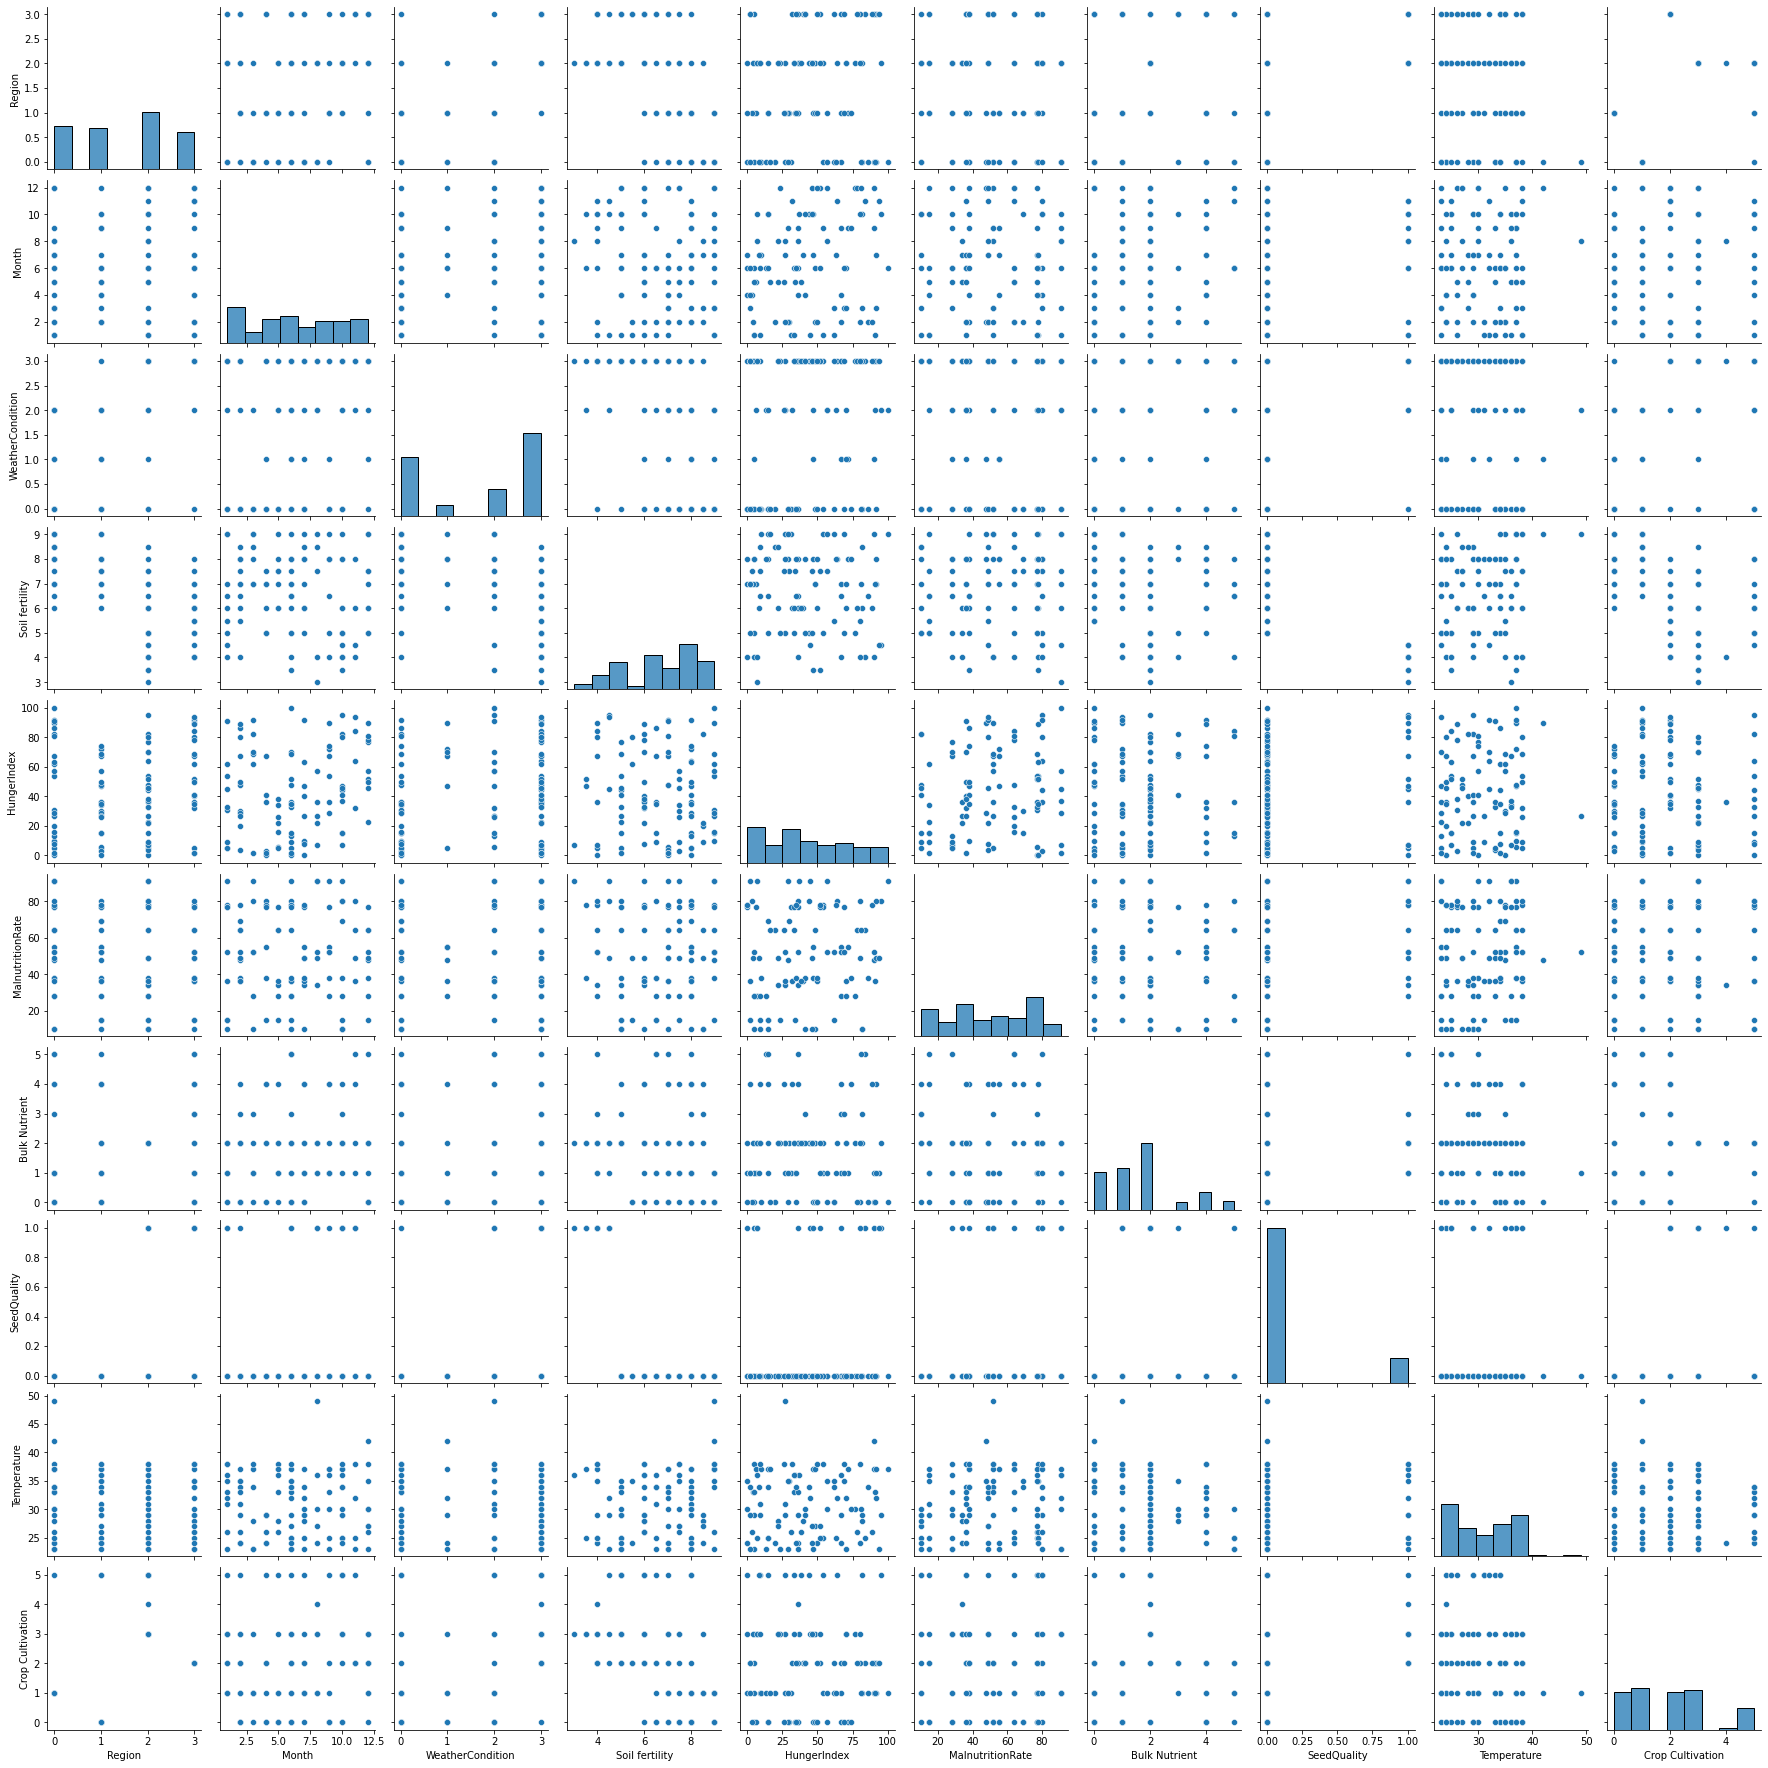

In [901]:
sns.pairplot(crop)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

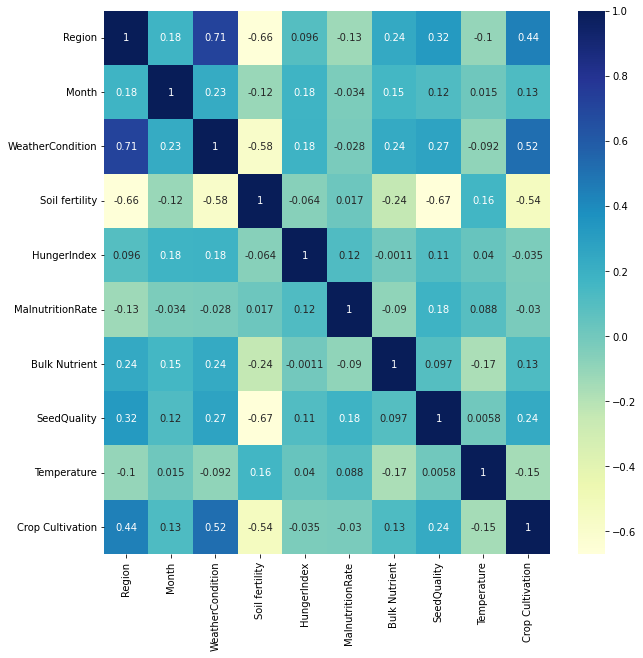

In [902]:
plt.figure(figsize=(10,10))
sns.heatmap(crop.corr(),annot=True,cmap="YlGnBu")
plt.show

In [903]:
#train test split

In [904]:
X = crop.drop(['Crop_Cultivation','Crop Cultivation','Irrigation Method'],axis=1)
y1 = crop['Crop_Cultivation']
y2 = crop['Irrigation Method']

In [905]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y1,random_state=1,test_size=0.2)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 9), (20, 9), (80,), (20,))

In [906]:
#training

In [907]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [908]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [909]:
#testing

In [910]:
y_pred = model.predict(X_test)

In [911]:
from sklearn.metrics import accuracy_score,classification_report

In [912]:
acc1 = accuracy_score(y_test,y_pred)

In [913]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   Groundnut       0.80      1.00      0.89         4
       Maize       1.00      1.00      1.00         2
        Rice       1.00      1.00      1.00         6
   Soya bean       0.83      0.83      0.83         6
      Wheat        0.00      0.00      0.00         2

    accuracy                           0.85        20
   macro avg       0.73      0.77      0.74        20
weighted avg       0.81      0.85      0.83        20



In [914]:
#predicting

In [915]:
crop.iloc[[25]]

,Region,Month,WeatherCondition,Soil fertility,HungerIndex,MalnutritionRate,Bulk Nutrient,SeedQuality,Temperature,Crop_Cultivation,Irrigation Method,Crop Cultivation
25,2,12,3,5.0,77,28,2,0,30,Soya bean,drip,3


In [916]:
res1 = model.predict(X.iloc[[25]])

In [917]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y2,random_state=1,test_size=0.2)

X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((80, 9), (20, 9), (80,), (20,))

In [918]:
model.fit(X1_train,y1_train)

RandomForestClassifier()

In [919]:
y1_pred = model.predict(X1_test)

In [920]:
acc2 = accuracy_score(y1_test,y1_pred)

In [921]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

       basin       1.00      1.00      1.00         6
        drip       1.00      0.62      0.77         8
      furrow       0.80      1.00      0.89         4
   sprinkler       0.50      1.00      0.67         2

    accuracy                           0.85        20
   macro avg       0.82      0.91      0.83        20
weighted avg       0.91      0.85      0.85        20



In [922]:
crop.iloc[[25]]

,Region,Month,WeatherCondition,Soil fertility,HungerIndex,MalnutritionRate,Bulk Nutrient,SeedQuality,Temperature,Crop_Cultivation,Irrigation Method,Crop Cultivation
25,2,12,3,5.0,77,28,2,0,30,Soya bean,drip,3


In [923]:
res2 = model.predict(X.iloc[[25]])

In [924]:
#conclusion

In [925]:
print("Suggested Cultivation :",res1)
print("Suggested Irrigation :",res2)

average = (acc1+acc2)/2
print("Accuracy of model = ",average*100,"%")

Suggested Cultivation : ['Soya bean']
Suggested Irrigation : ['drip']
Accuracy of model =  85.0 %
